# **Is the Price Right? Macroeconomic Determinants of Housing Prices**

## Amrit Gill

## Introduction

Research Question: How do the Unemployment Rate and Consumer Price Index affect the House Price Index?

To answer this question, I will be using Ordinary Least Squares estimation. 

Variables:

* **House Price Index** (Dependent Variable): A measure tracking changes in single-family home prices across the United States

* **Unemployment Rate** (Independent Variable): Percentage of the labor force actively seeking but unable to find work

* **Consumer Price Index** (Independent Variable): Measures average price changes for consumer goods and services

I sourced the data from Kaggle, where key macroeconomic indicators that are affecting house prices were compiled using FRED.

[Dataset Link: USA Housing Market Factors on Kaggle](https://www.kaggle.com/datasets/faryarmemon/usa-housing-market-factors)

## Data Preparation

In [296]:
# Libraries
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [297]:
data = pd.read_csv("Economic_Data_Combined.csv")
data['Date'] = pd.to_datetime(initial_data['Date'])
data.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908.0
1,1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346.0
2,1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780.0
3,1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497.0
4,1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672.0


In [298]:
# Summary Statistics and Missing Values
print(data.describe())
print(data.isnull().sum())

                      Date  House_Price_Index  Stock_Price_Index  \
count                   20          20.000000          20.000000   
mean   1984-07-02 00:00:00         126.414500         185.017463   
min    1975-01-01 00:00:00          61.090000          67.146530   
25%    1979-10-01 18:00:00         100.783750          96.408017   
50%    1984-07-02 00:00:00         124.560000         147.364995   
75%    1989-04-02 06:00:00         162.325000         265.555158   
max    1994-01-01 00:00:00         182.575000         373.121080   
std                    NaN          38.946933         104.031112   

       Consumer_Price_Index  Population  Unemployment_Rate      Real_GDP  \
count             20.000000   20.000000          20.000000     20.000000   
mean             124.704217    1.036698           7.040001   7898.340100   
min               65.304880    0.865820           5.266670   5648.462000   
25%               97.016887    0.921715           6.079165   6776.571500   
50%    

## OLS Estimation

In [300]:
# Relevant Variables
features = data[['Unemployment_Rate', 'Consumer_Price_Index']]
target = data['House_Price_Index']

In [301]:
# Manual OLS Estimation
X = features
y = target
# Add Intercept
X = sm.add_constant(X)

# Calculate Coefficients: Beta = (X'X)^(-1)X'y
X_transpose = np.transpose(X)
XtX = np.dot(X_transpose, X)
XtX_inv = np.linalg.inv(XtX)
Xty = np.dot(X_transpose, y)
beta_manual = np.dot(XtX_inv, Xty)

# Predicted and R-squared Values
y_pred = np.dot(X, beta_manual)
residuals = y - y_pred
SSR = np.sum(residuals**2)
SST = np.sum((y - np.mean(y))**2)
R_squared = 1 - (SSR/SST)

# Results
print("OLS Results:")
print("Coefficients:")
print(f"Constant: {beta_manual[0]:.4f}")
print(f"Unemployment Rate: {beta_manual[1]:.4f}")
print(f"Consumer Price Index: {beta_manual[2]:.4f}")
print(f"R-squared: {R_squared:.4f}")

OLS Results:
Coefficients:
Constant: 25.6712
Unemployment Rate: -3.7621
Consumer Price Index: 1.0202
R-squared: 0.9966


In [302]:
# OLS Estimation using statsmodels library
X = sm.add_constant(features)
model = sm.OLS(target, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      House_Price_Index   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2473.
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.11e-21
Time:                        15:56:05   Log-Likelihood:                -44.343
No. Observations:                  20   AIC:                             94.69
Df Residuals:                      17   BIC:                             97.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   25.6712 

## Data Visualization

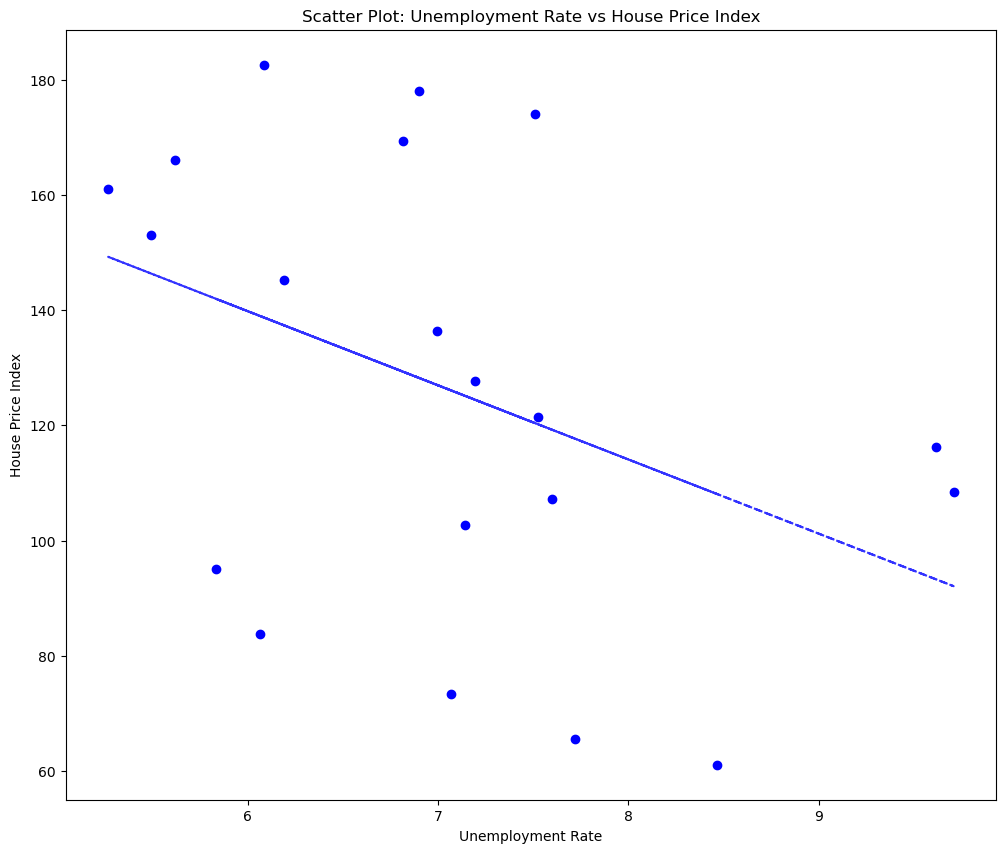

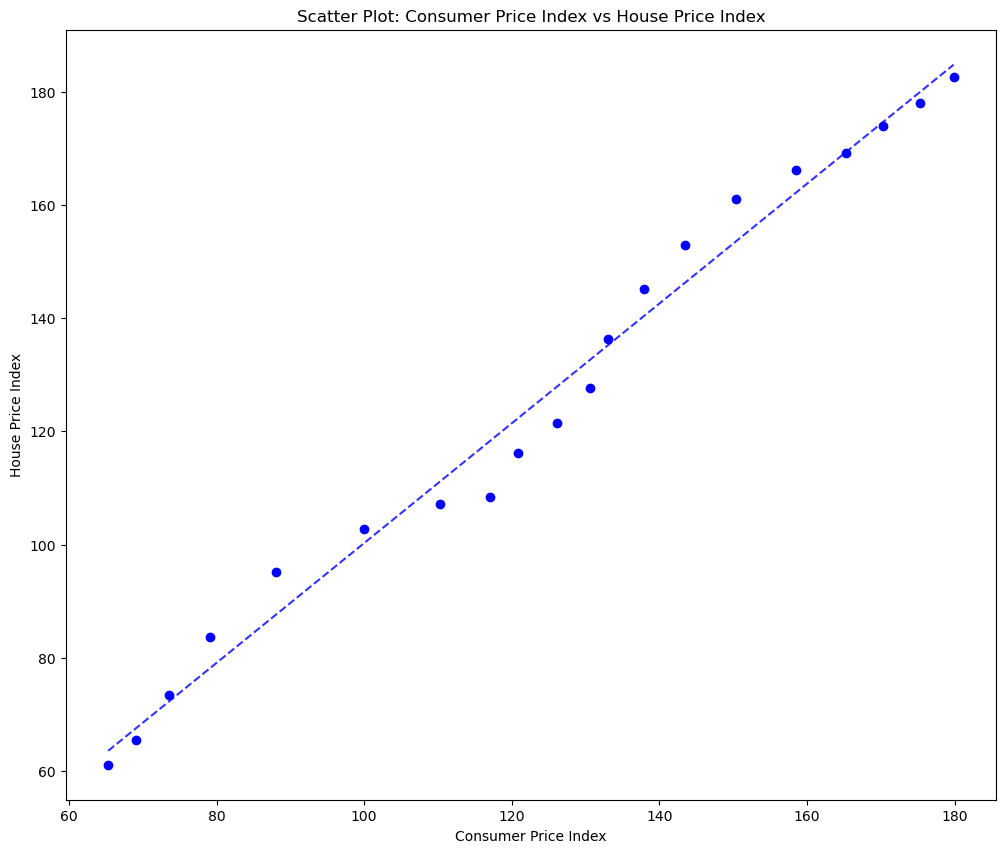

In [304]:
# Visualize

# Unemployment Rate vs House Price Index Scatter Plot
plt.figure(figsize=(12, 10))
plt.scatter(data['Unemployment_Rate'], data['House_Price_Index'], color='blue', marker='o')

# Labels
plt.xlabel('Unemployment Rate')
plt.ylabel('House Price Index')
plt.title('Scatter Plot: Unemployment Rate vs House Price Index')

# Regression Line
z = np.polyfit(data['Unemployment_Rate'], data['House_Price_Index'], 1)
p = np.poly1d(z)
plt.plot(data['Unemployment_Rate'], p(data['Unemployment_Rate']), "b--", alpha=0.8)

plt.show()

# Consumer Price Index vs House Price Index Scatter Plot
plt.figure(figsize=(12, 10))
plt.scatter(data['Consumer_Price_Index'], data['House_Price_Index'], color='blue', marker='o')

# Labels
plt.xlabel('Consumer Price Index')
plt.ylabel('House Price Index')
plt.title('Scatter Plot: Consumer Price Index vs House Price Index')

# Regression Line
z = np.polyfit(data['Consumer_Price_Index'], data['House_Price_Index'], 1)
p = np.poly1d(z)
plt.plot(data['Consumer_Price_Index'], p(data['Consumer_Price_Index']), "b--", alpha=0.8)

plt.show()

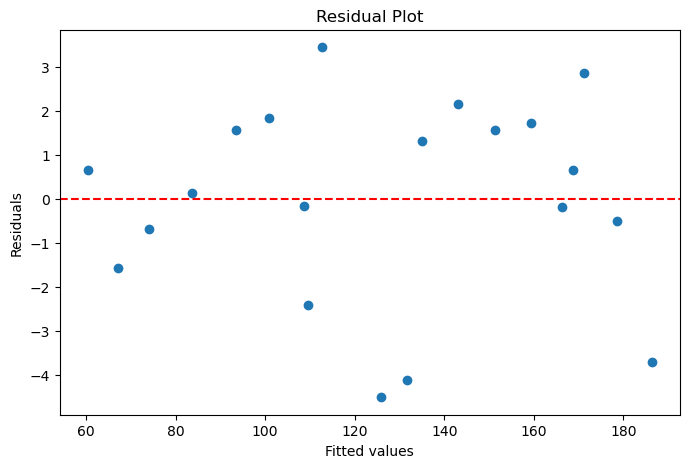

In [305]:
# Residual Plot
plt.figure(figsize=(8, 5))

# x-axis shows the predicted values
# y-axis shows residuals = actual values - predicted values
plt.scatter(results.fittedvalues, results.resid)

# Line shows if residuals are evenly distributed above and below zero
plt.axhline(y=0, color='r', linestyle='--')

# Labels
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Results and Analysis

**Results**

In [308]:
print("Comparison of OLS Results:")
print("\n1. Manual OLS Results:")
print("Coefficients:")
print("Constant: 25.6712")
print("Unemployment Rate: -3.7621")
print("Consumer Price Index: 1.0202")
print("R-squared: 0.9966")

print("\n2. Library OLS Results:")
print("Coefficients:")
print("Constant: 25.6712")
print("Unemployment Rate: -3.7621 (p-value: 0.000)")
print("Consumer Price Index: 1.0202 (p-value: 0.000)")
print("R-squared: 0.997")

Comparison of OLS Results:

1. Manual OLS Results:
Coefficients:
Constant: 25.6712
Unemployment Rate: -3.7621
Consumer Price Index: 1.0202
R-squared: 0.9966

2. Library OLS Results:
Coefficients:
Constant: 25.6712
Unemployment Rate: -3.7621 (p-value: 0.000)
Consumer Price Index: 1.0202 (p-value: 0.000)
R-squared: 0.997


**Statistical Results Analysis**

* The Unemployment Rate coefficient (-3.7621) shows that for every 1 percentage point increase in unemployment, the House Price Index decreases by ~3.76 points, holding other factors constant.
  
* The Consumer Price Index coefficient (1.0202) shows that for every 1-point increase in CPI, the House Price Index increases by ~1.02 points, holding other factors constant.

* The R-squared value of 0.997 shows that the model explains 99.7% of the variation in house prices, meaning its an excellent fit.
  
* The p-values (0.000) for both variables indicate that these relationships are statistically significant.

**Visual Analysis**

* Unemployment Rate vs House Price Index: The scatter plot indicates a strong negative relationship shown by the downward sloping regression line. This means that as unemployment rates increase, housing prices tend to decrease. The spread of points around the regression line means there may be some variation in this relationship, but the overall trend is negative.
  
* Consumer Price Index vs House Price Index: The scatter plot indicates a strong positive relationship shown by the upward sloping regression line. The clustering of points around the line means there is a consistent relationship between CPI and house prices. As consumer prices rise, housing prices rise too.

* Residual Plot: The model generally fits well since most residuals cluster around zero. Even though there are a few outliers, they dont seem to suggest any issues. The random scatter shows the linear model is reliable.

## Conclusion

The analysis demonstrates that Unemployment Rate and Consumer Price Index are strong predictors of housing prices, with relationships that align with economic theory. The model's high R-squared value and significant p-values validate its robustness in explaining housing price movements. The negative relationship with unemployment shows how lower unemployment rates lead to increased purchasing power through higher employment and wages, driving up housing demand and prices. The positive relationship with CPI shows how inflationary periods in the economy can impact the housing market, as rising wages and prices push housing values up. These effects create a comprehensive analysis for understanding housing price dynamics, where both labor market conditions and price levels play important roles in determining outcomes in the housing market.

During this project, I encountered challenges in handling potential multicollinearity between economic indicators, as suggested by the condition number. However, the statistical significance of both the unemployment rate and CPI and economic theory support their inclusion in the model. This project has deepened my understanding of how macroeconomic factors interact with housing markets and improved my skills in econometric modeling and statistical interpretation.